In [1]:
import torch
import torch.nn.functional as F
import matplotlib as plt

decoded = torch.load('decoded.pt')
gt = torch.load('gt.pt')

print(decoded.shape)
img = torch.Tensor(decoded)  # 假设image_array是图像的数值矩阵
# img = img.unsqueeze(0).unsqueeze(0)  # 添加batch和channel维度
filtered_img = F.median_pool2d(img, kernel_size=5, padding=2)# 中值滤波
# filtered_img = filtered_img.squeeze(0).squeeze(0)  # 移除batch和channel维度

# 显示原图和处理后的图像
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.show()

torch.Size([2, 361, 720])


AttributeError: module 'torch.nn.functional' has no attribute 'median_pool2d'

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def median_filter2d(img, kernel_size=5):
    # 计算 padding 大小
    pad_size = kernel_size // 2
    
    # 对图像进行 padding
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')
    
    # 获取图像的尺寸
    batch_size, channels, height, width = img_padded.shape
    
    # 展开图像矩阵
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)
    
    # 计算中值
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, height * width)
    median = unfolded.median(dim=2)[0]
    
    # 恢复图像尺寸
    median = median.view(batch_size, channels, height, width)
    
    return median

# 加载图像
decoded = torch.load('decoded.pt')
gt = torch.load('gt.pt')

# 假设图像是灰度图
img = torch.Tensor(decoded).unsqueeze(0).unsqueeze(0)  # 添加 batch 和 channel 维度

# 应用中值滤波
filtered_img = median_filter2d(img, kernel_size=5)

# 移除 batch 和 channel 维度
img = img.squeeze(0).squeeze(0)
filtered_img = filtered_img.squeeze(0).squeeze(0)

# 显示原图和处理后的图像
plt.subplot(1, 2, 1)
plt.imshow(img.numpy(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img.numpy(), cmap='gray')
plt.title('Filtered Image')

plt.show()

NotImplementedError: Only 2D, 3D, 4D, 5D padding with non-constant padding are supported for now

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def median_filter2d(img, kernel_size=5):
    # 计算 padding 大小
    pad_size = kernel_size // 2
    
    # 对图像进行 padding
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')
    
    # 获取图像的尺寸
    batch_size, channels, height, width = img_padded.shape
    
    # 展开图像矩阵
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)
    
    # 计算中值
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, height * width)
    median = unfolded.median(dim=2)[0]
    
    # 恢复图像尺寸
    median = median.view(batch_size, channels, height, width)
    
    return median

# 加载图像
decoded = torch.load('decoded.pt')
gt = torch.load('gt.pt')

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度

# 应用中值滤波
filtered_img = median_filter2d(img, kernel_size=5)

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img = filtered_img.squeeze(1)

# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 2, 2 * i + 1)
    plt.imshow(img[i].numpy(), cmap='gray')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 2, 2 * i + 2)
    plt.imshow(filtered_img[i].numpy(), cmap='gray')
    plt.title(f'Filtered Image {i+1}')

plt.show()

RuntimeError: shape '[2, 1, 25, 264260]' is invalid for input of size 12996000

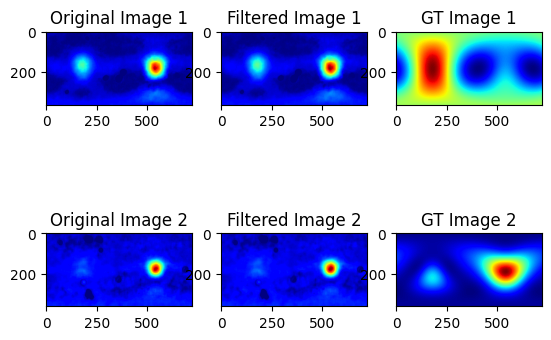

原来loss=0.8693113327026367，滤波后loss=0.8669736385345459


In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

# 加载图像
decoded = torch.load('decoded.pt').cpu()
gt = torch.load('gt.pt').cpu()

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度

# 应用中值滤波
filtered_img = median_filter2d(img, kernel_size=5)

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img = filtered_img.squeeze(1)

# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 3, 3 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 3, 3 * i + 2)
    plt.imshow(filtered_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Filtered Image {i+1}')

    plt.subplot(2, 3, 3 * i + 3)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')

plt.show()
mseloss = torch.nn.MSELoss()
loss0 = mseloss(img,gt)
loss1 = mseloss(filtered_img,gt)
print(f'原来loss={loss0}，滤波后loss={loss1}')

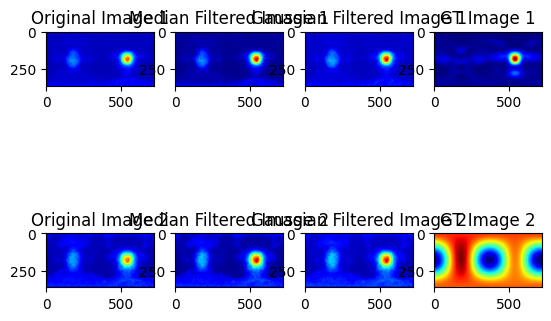

原来loss=2.178515911102295，中值滤波后loss=2.1701607704162598，高斯滤波后loss=2.1765658855438232


In [10]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded.pt').cpu()
gt = torch.load('gt.pt').cpu()

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度

# 应用中值滤波
filtered_img_median = median_filter2d(img, kernel_size=5)

# 应用高斯滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=1.0)

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
plt.show()

mseloss = torch.nn.MSELoss()
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
print(f'原来loss={loss0:.4f}，中值滤波后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}')

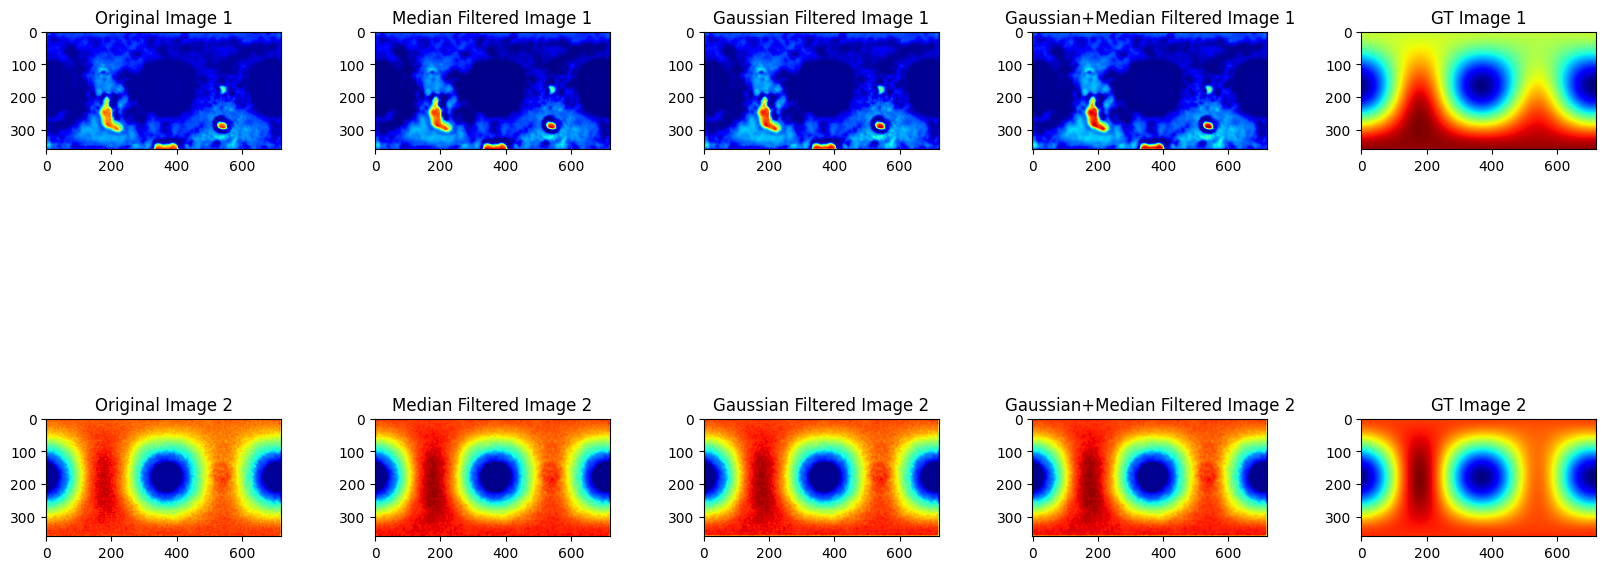

原来loss=0.0648，中值滤波后loss=0.0601，高斯滤波后loss=0.0659，both后loss=0.0629


In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded.pt').cpu()
gt = torch.load('gt.pt').cpu()

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=1.0)# 应用高斯滤波
both_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=1.0)#两个都用
# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
both_img = both_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(both_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian+Median Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss()
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(both_img,gt)
print(f'原来loss={loss0:.4f}，中值滤波后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，both后loss={loss3:.4f}')

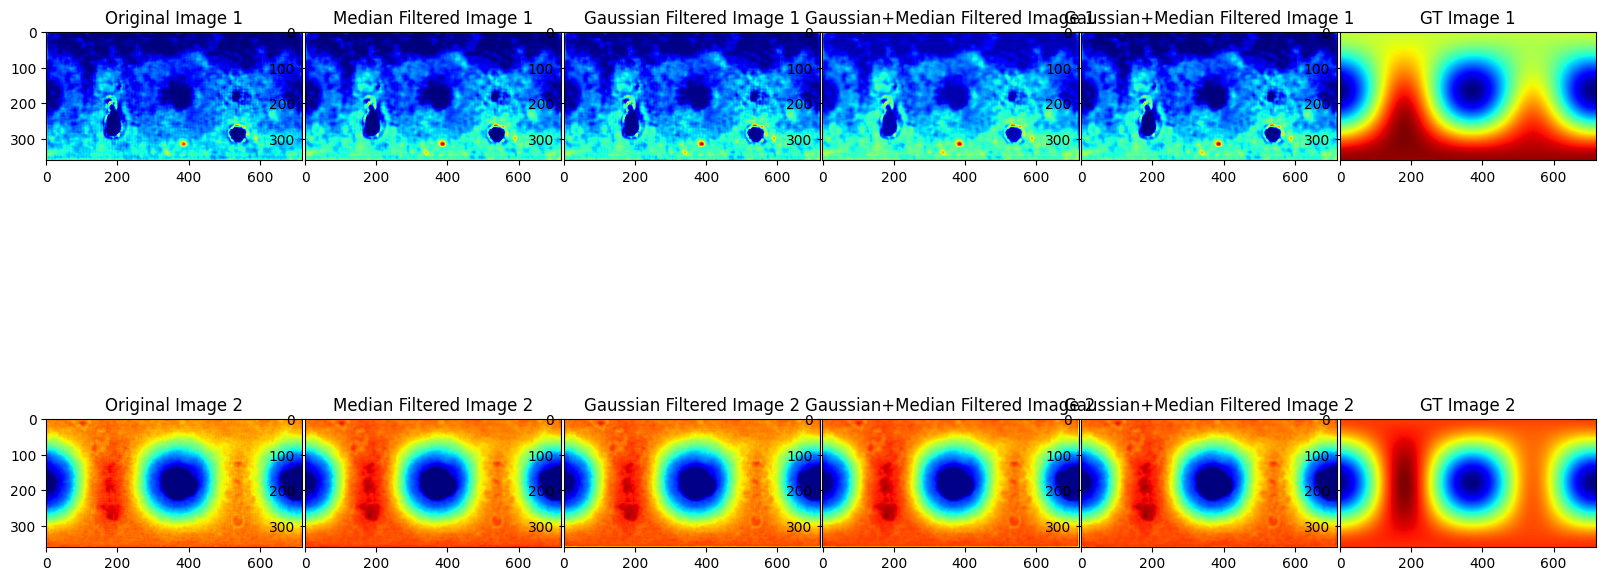

原来loss=0.0212，中值滤波10后loss=0.0198，高斯滤波后loss=0.0239，MG后loss=0.0229，GM后loss=0.0196


In [23]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded.pt').cpu()
gt = torch.load('gt.pt').cpu()

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=1.0)# 应用高斯滤波
bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=1.0)#两个都用
bothGM_img = median_filter2d(filtered_img_gaussian, kernel_size=5)#两个都用

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
bothMG_img = bothMG_img.squeeze(1)
bothGM_img = bothGM_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(bothMG_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian+Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(bothGM_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian+Median Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 6)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss()
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(bothMG_img,gt)
loss4 = mseloss(bothGM_img,gt)
print(f'原来loss={loss0:.4f}，中值滤波10后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，MG后loss={loss3:.4f}，GM后loss={loss4:.4f}')

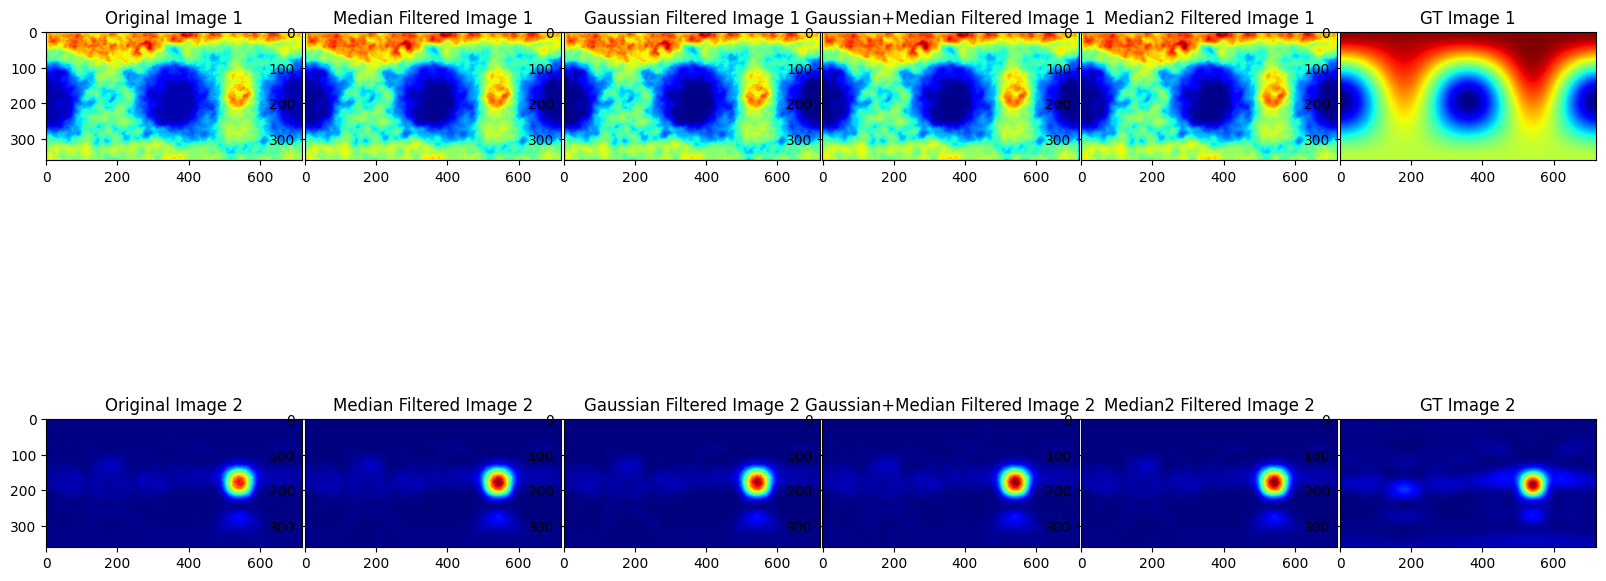

原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2713，MG后loss=0.2695，GM后loss=0.2707


In [25]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded2.pt').cpu()
gt = torch.load('gt2.pt').cpu()

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=1.0)# 应用高斯滤波
bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=1.0)#两个都用
bothGM_img = median_filter2d(filtered_img_median, kernel_size=5)#两个都用

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
bothMG_img = bothMG_img.squeeze(1)
bothGM_img = bothGM_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(bothMG_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian+Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(bothGM_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median2 Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 6)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss()
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(bothMG_img,gt)
loss4 = mseloss(bothGM_img,gt)
print(f'原来loss={loss0:.4f}，中值滤波10后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，MG后loss={loss3:.4f}，GM后loss={loss4:.4f}')

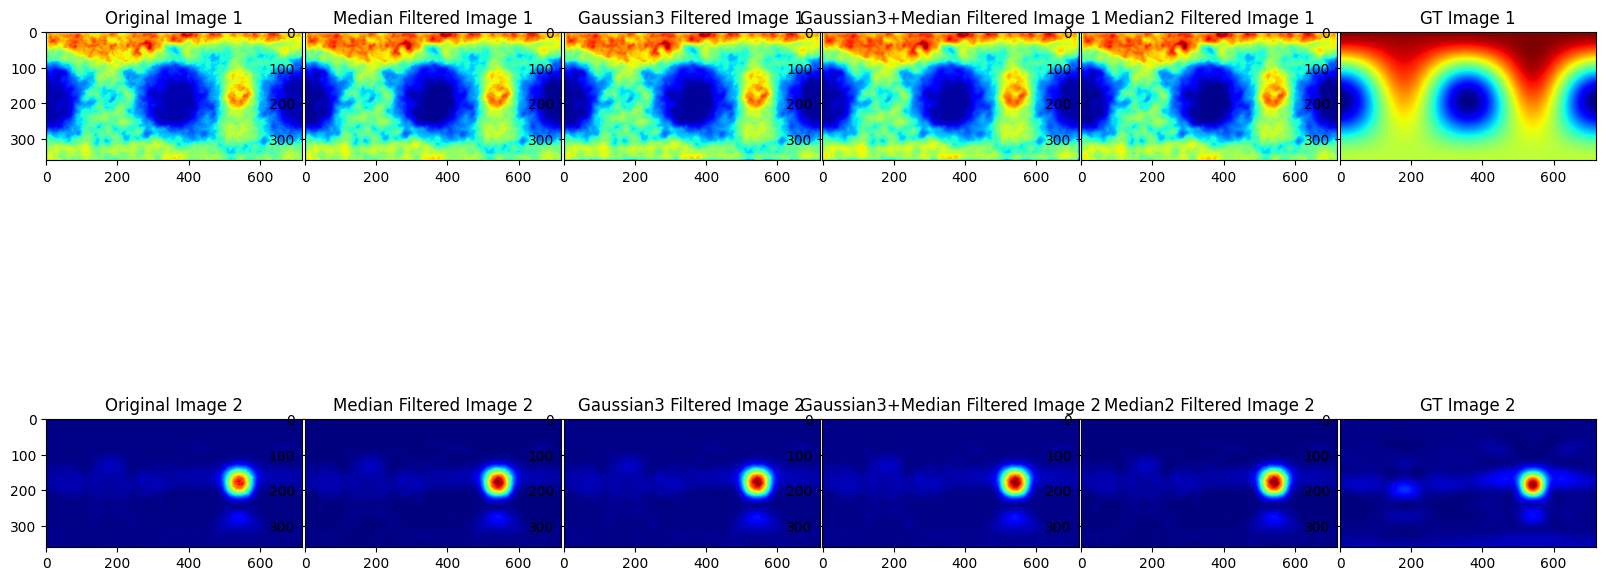

原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2701，MG后loss=0.2683，GM后loss=0.2707


In [26]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded2.pt').cpu()
gt = torch.load('gt2.pt').cpu()

# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=3.0)# 应用高斯滤波
bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=3.0)#两个都用
bothGM_img = median_filter2d(filtered_img_median, kernel_size=5)#两个都用

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
bothMG_img = bothMG_img.squeeze(1)
bothGM_img = bothGM_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian3 Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(bothMG_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian3+Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(bothGM_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median2 Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 6)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss()
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(bothMG_img,gt)
loss4 = mseloss(bothGM_img,gt)
print(f'原来loss={loss0:.4f}，中值滤波10后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，MG后loss={loss3:.4f}，GM后loss={loss4:.4f}')

In [27]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded2.pt').cpu()
gt = torch.load('gt2.pt').cpu()

for sigma in range(1,10):
    # 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
    # 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
    img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
    filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
    filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=sigma)# 应用高斯滤波
    bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=sigma)#两个都用
    bothGM_img = median_filter2d(filtered_img_median, kernel_size=5)#两个都用

    # 移除 batch 和 channel 维度
    img = img.squeeze(1)
    filtered_img_median = filtered_img_median.squeeze(1)
    filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
    bothMG_img = bothMG_img.squeeze(1)
    bothGM_img = bothGM_img.squeeze(1)
    gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

    mseloss = torch.nn.MSELoss()
    loss0 = mseloss(img, gt)
    loss1 = mseloss(filtered_img_median, gt)
    loss2 = mseloss(filtered_img_gaussian, gt)
    loss3 = mseloss(bothMG_img,gt)
    loss4 = mseloss(bothGM_img,gt)
    print(f'sigma={sigma},原来loss={loss0:.4f}，中值滤波10后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，MG后loss={loss3:.4f}，GM后loss={loss4:.4f}')

sigma=1,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2713，MG后loss=0.2695，GM后loss=0.2707
sigma=2,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2703，MG后loss=0.2685，GM后loss=0.2707
sigma=3,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2701，MG后loss=0.2683，GM后loss=0.2707
sigma=4,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2700，MG后loss=0.2682，GM后loss=0.2707
sigma=5,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2700，MG后loss=0.2682，GM后loss=0.2707
sigma=6,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2700，MG后loss=0.2682，GM后loss=0.2707
sigma=7,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2700，MG后loss=0.2682，GM后loss=0.2707
sigma=8,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2700，MG后loss=0.2682，GM后loss=0.2707
sigma=9,原来loss=0.2743，中值滤波10后loss=0.2714，高斯滤波后loss=0.2700，MG后loss=0.2682，GM后loss=0.2707


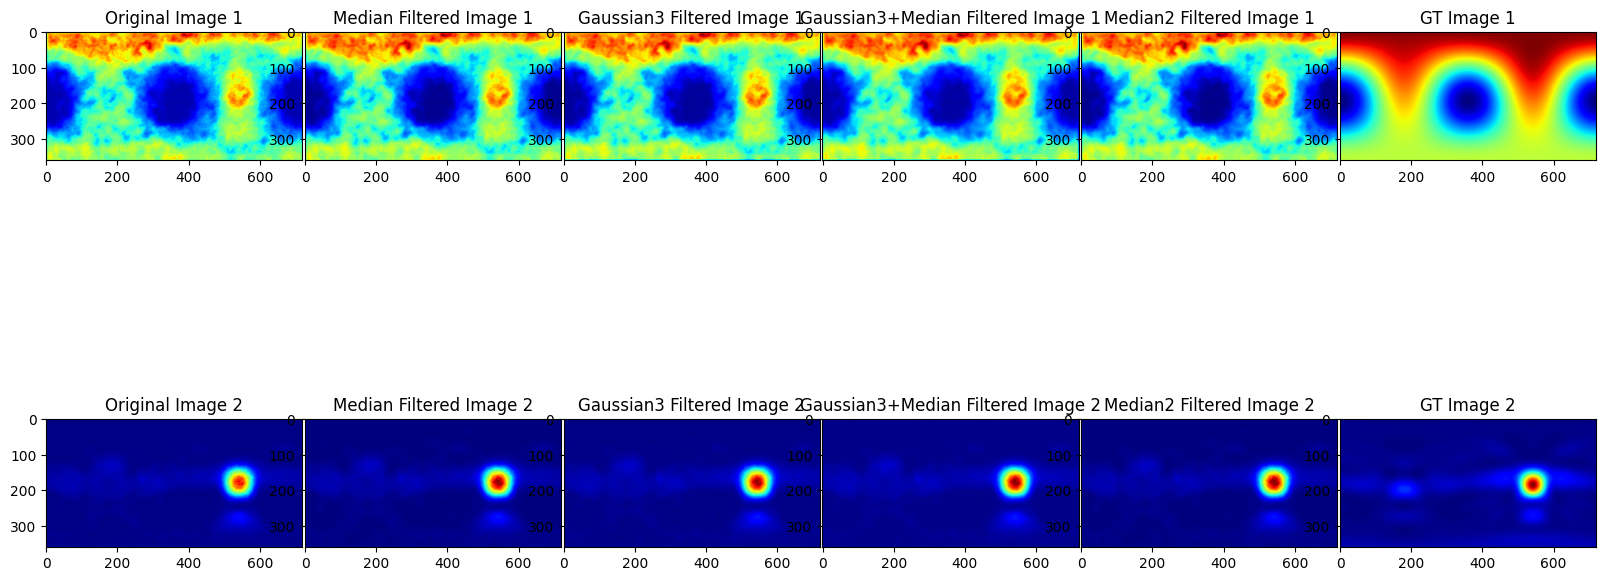

原来loss=142607.2188，中值滤波10后loss=141088.7031，高斯滤波后loss=140381.4688，MG后loss=139440.8438，GM后loss=140711.9844


In [30]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded2.pt').cpu()
gt = torch.load('gt2.pt').cpu()

sigma = 4.
# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=sigma)# 应用高斯滤波
bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=sigma)#两个都用 这个效果好
bothGM_img = median_filter2d(filtered_img_median, kernel_size=5)#两个都用

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
bothMG_img = bothMG_img.squeeze(1)
bothGM_img = bothGM_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian3 Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(bothMG_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian3+Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(bothGM_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median2 Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 6)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss(reduction='sum')
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(bothMG_img,gt)
loss4 = mseloss(bothGM_img,gt)
print(f'原来loss={loss0:.4f}，中值滤波10后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，MG后loss={loss3:.4f}，GM后loss={loss4:.4f}')

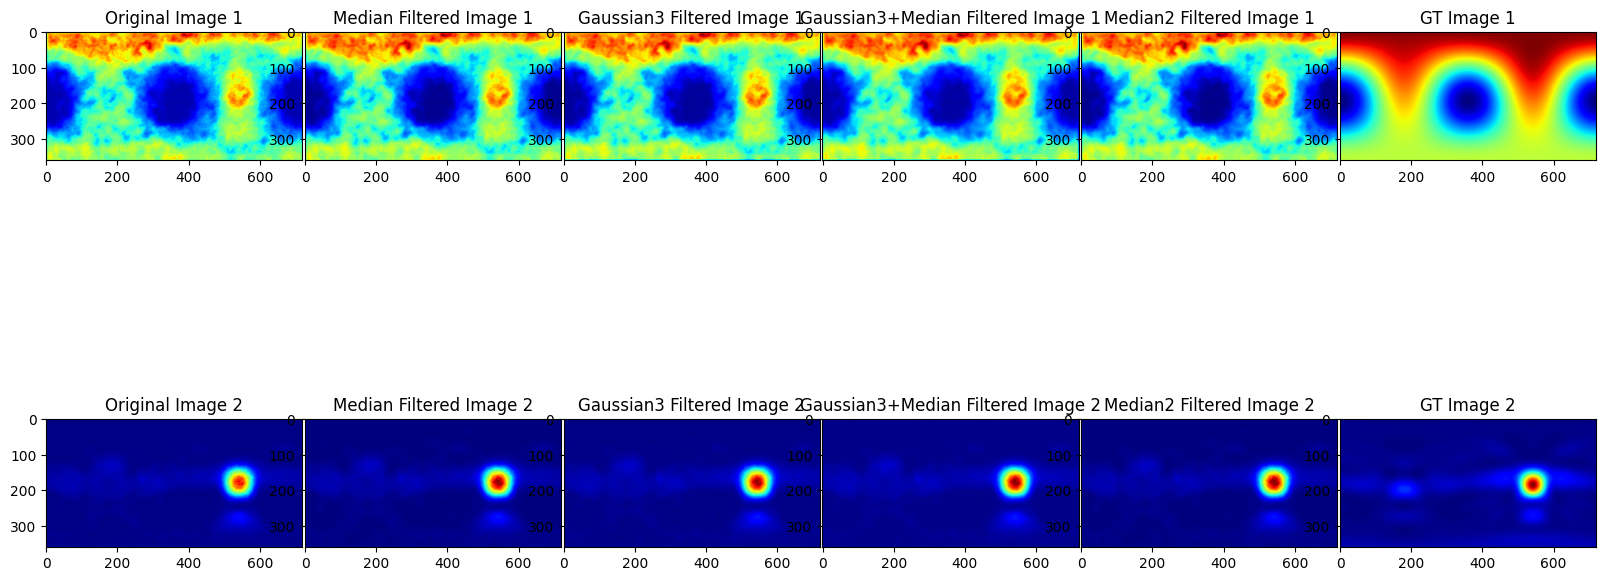

原来loss=142607.2188，中值滤波10后loss=141088.7031，高斯滤波后loss=140381.4688，MG后loss=139440.8438，GM后loss=140711.9844
原来loss=212805.9062，中值滤波10后loss=167495.9375，高斯滤波后loss=163270.1562，MG后loss=158680.6719，GM后loss=161628.7812


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

class SmoothLoss(nn.Module):
    def __init__(self, alpha=1.0, beta=1.0):
        super(SmoothLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta

    def forward(self, decoded, GT):
        # Calculate the MSE loss
        mse_loss = nn.MSELoss(reduction='sum')
        loss_mse = mse_loss(decoded, GT)

        diff1 = torch.abs(decoded[:,  :-1, :] - decoded[:,  1:, :])
        diff2 = torch.abs(decoded[:,  :, :-1] - decoded[:,  :, 1:])
        smoothness_loss = torch.sum(diff1) + torch.sum(diff2) * self.alpha
        # print(f"smoothloss:{smoothness_loss*self.beta:.4f},mseloss:{loss_mse:.4f}")
        total_loss = loss_mse + smoothness_loss * self.beta
        return total_loss

def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded2.pt').cpu()
gt = torch.load('gt2.pt').cpu()

sigma = 4.
# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=sigma)# 应用高斯滤波
bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=sigma)#两个都用 这个效果好
bothGM_img = median_filter2d(filtered_img_median, kernel_size=5)#两个都用

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
bothMG_img = bothMG_img.squeeze(1)
bothGM_img = bothGM_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian3 Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(bothMG_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian3+Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(bothGM_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median2 Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 6)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss(reduction='sum')
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(bothMG_img,gt)
loss4 = mseloss(bothGM_img,gt)
print(f'原来loss={loss0:.4f}，中值滤波10后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，MG后loss={loss3:.4f}，GM后loss={loss4:.4f}')
smloss = SmoothLoss()
smloss0 = smloss(img, gt)
smloss1 = smloss(filtered_img_median, gt)
smloss2 = smloss(filtered_img_gaussian, gt)
smloss3 = smloss(bothMG_img,gt)
smloss4 = smloss(bothGM_img,gt)
print(f'原来loss={smloss0:.4f}，中值滤波10后loss={smloss1:.4f}，高斯滤波后loss={smloss2:.4f}，MG后loss={smloss3:.4f}，GM后loss={smloss4:.4f}')

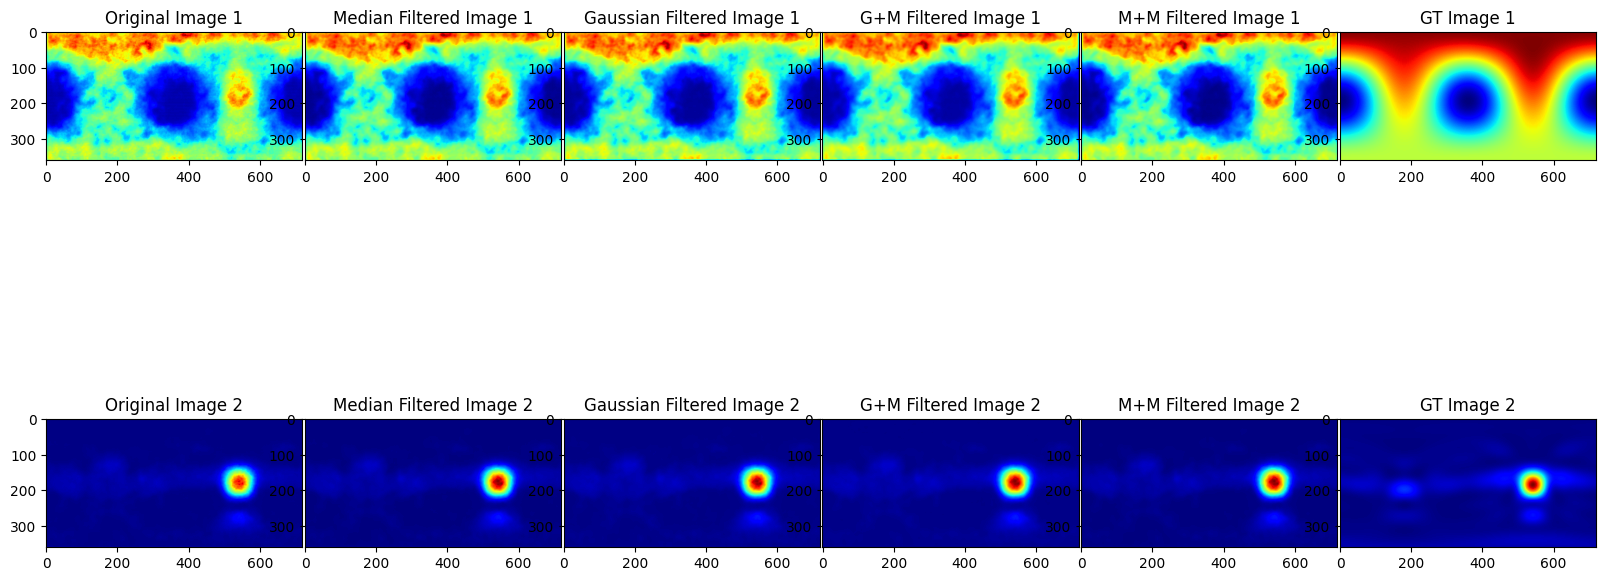

Mseloss原来loss=142607.2188，中值滤波后loss=141088.7031，高斯滤波后loss=140381.4688，先中值后高斯loss=139440.8438，两次中值后loss=140711.9844
Smoothloss原来loss=177706.5625，中值滤波后loss=154292.3281，高斯滤波后loss=151825.8125，先中值后高斯loss=149060.7500，两次中值后loss=151170.3906


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

class SmoothLoss(nn.Module):
    def __init__(self, alpha=1.0, beta=1.0):
        super(SmoothLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta

    def forward(self, decoded, GT):
        # Calculate the MSE loss
        mse_loss = nn.MSELoss(reduction='sum')
        loss_mse = mse_loss(decoded, GT)

        diff1 = torch.abs(decoded[:,  :-1, :] - decoded[:,  1:, :])
        diff2 = torch.abs(decoded[:,  :, :-1] - decoded[:,  :, 1:])
        smoothness_loss = torch.sum(diff1) + torch.sum(diff2) * self.alpha
        # print(f"smoothloss:{smoothness_loss*self.beta:.4f},mseloss:{loss_mse:.4f}")
        total_loss = loss_mse + smoothness_loss * self.beta
        return total_loss

def median_filter2d(img, kernel_size=5):
    pad_size = kernel_size // 2    # 计算 padding 大小
    img_padded = F.pad(img, (pad_size, pad_size, pad_size, pad_size), mode='reflect')    # 对图像进行 padding
    batch_size, channels, height, width = img_padded.shape    # 获取图像的尺寸
    unfolded = F.unfold(img_padded, kernel_size=kernel_size)    # 展开图像矩阵
    unfolded = unfolded.view(batch_size, channels, kernel_size * kernel_size, -1)    # 计算中值
    median = unfolded.median(dim=2)[0]
    median = median.view(batch_size, channels, height - 2 * pad_size, width - 2 * pad_size)    # 恢复图像尺寸
    return median

def gaussian_kernel(size, sigma):
    """生成一个高斯核"""
    kernel = torch.tensor([[(1/(2.0*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2))
                            for x in range(size)] for y in range(size)]).float()
    kernel /= kernel.sum()
    return kernel.unsqueeze(0).unsqueeze(0)

def gaussian_filter2d(img, kernel_size=5, sigma=1.0):
    """应用高斯滤波"""
    kernel = gaussian_kernel(kernel_size, sigma)
    channels = img.shape[1]
    kernel = kernel.repeat(channels, 1, 1, 1)
    padding = kernel_size // 2
    filtered_img = F.conv2d(img, kernel, padding=padding, groups=channels)
    return filtered_img

# 加载图像
decoded = torch.load('decoded2.pt').cpu()
gt = torch.load('gt2.pt').cpu()

sigma = 4.
# 假设图像是灰度图，转换形状为 [batch_size, channels, height, width]
# 这里的 decoded 是 [2, 361, 720]，我们假设 batch_size = 2，channels = 1
img = torch.Tensor(decoded).unsqueeze(1)  # 添加 channel 维度
filtered_img_median = median_filter2d(img, kernel_size=5)# 应用中值滤波
filtered_img_gaussian = gaussian_filter2d(img, kernel_size=5, sigma=sigma)# 应用高斯滤波
bothMG_img = gaussian_filter2d(filtered_img_median, kernel_size=5, sigma=sigma)#两个都用 这个效果好
bothGM_img = median_filter2d(filtered_img_median, kernel_size=5)#两个都用

# 移除 batch 和 channel 维度
img = img.squeeze(1)
filtered_img_median = filtered_img_median.squeeze(1)
filtered_img_gaussian = filtered_img_gaussian.squeeze(1)
bothMG_img = bothMG_img.squeeze(1)
bothGM_img = bothGM_img.squeeze(1)
gt = torch.Tensor(gt).squeeze(1)  # 确保 gt 形状正确

plt.figure(figsize=(20, 10))
# 显示原图和处理后的图像
for i in range(img.shape[0]):
    plt.subplot(2, 6, 6 * i + 1)
    plt.imshow(img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Original Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 2)
    plt.imshow(filtered_img_median[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Median Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 3)
    plt.imshow(filtered_img_gaussian[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'Gaussian Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 4)
    plt.imshow(bothMG_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'G+M Filtered Image {i+1}')

    plt.subplot(2, 6, 6 * i + 5)
    plt.imshow(bothGM_img[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'M+M Filtered Image {i+1}')
    
    plt.subplot(2, 6, 6 * i + 6)
    plt.imshow(gt[i].cpu().detach().numpy(), cmap='jet')
    plt.title(f'GT Image {i+1}')
# plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

mseloss = torch.nn.MSELoss(reduction='sum')
loss0 = mseloss(img, gt)
loss1 = mseloss(filtered_img_median, gt)
loss2 = mseloss(filtered_img_gaussian, gt)
loss3 = mseloss(bothMG_img,gt)
loss4 = mseloss(bothGM_img,gt)
print(f'Mseloss原来loss={loss0:.4f}，中值滤波后loss={loss1:.4f}，高斯滤波后loss={loss2:.4f}，先中值后高斯loss={loss3:.4f}，两次中值后loss={loss4:.4f}')
smloss = SmoothLoss()
smloss0 = smloss(img, gt)
smloss1 = smloss(filtered_img_median, gt)
smloss2 = smloss(filtered_img_gaussian, gt)
smloss3 = smloss(bothMG_img,gt)
smloss4 = smloss(bothGM_img,gt)
print(f'Smoothloss原来loss={smloss0:.4f}，中值滤波后loss={smloss1:.4f}，高斯滤波后loss={smloss2:.4f}，先中值后高斯loss={smloss3:.4f}，两次中值后loss={smloss4:.4f}')